# NLP

Natural Language Processing with NLTK

In [1]:
import nltk
import pandas as pd

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

#Shape of datas

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#set up Data

data = open('/kaggle/input/sms-spam-collection/SMSSpamCollection.tsv').read()
Cdata = data.replace('\t','\n').split('\n')
labellist = Cdata[0::2]
textlist = Cdata[1::2]

fullCorpus = pd.DataFrame({
    'label' : labellist[:-1],    #-1 to remove a space creating an error
    'body' : textlist
})


In [3]:
print('Input data has {} rows and {} columns. of which there are {} spams and {} harmless. Further, there are {} nulls'.format(len(fullCorpus),
                                                                                                  len(fullCorpus.columns),
                                                                                                len(fullCorpus[fullCorpus['label']=='spam']),
                                                                                                 len(fullCorpus[fullCorpus['label']=='ham']),
                                                                                                  fullCorpus['label'].isnull().sum()                      ))


Input data has 5570 rows and 2 columns. of which there are 746 spams and 4824 harmless. Further, there are 0 nulls


In [4]:
pd.set_option('display.max_colwidth',150) #lager columns
import string
import re

def remove_punct(text):
    text_nopunct = ''.join([char.lower() for char in text if char not in string.punctuation])  #return charecters not punctuation. Then "join" on no-character i.e. ''
    return text_nopunct

def tokenize(text):
    return re.findall('\w+',text)

from nltk.corpus import stopwords

def remove_stop_w(tokens):
    return [tk for tk in tokens if tk not in stopwords.words('english')]

* > **Stemming and lemmatizing**

Reducing number of words by taking only 1 instance of words with same root and semantic meaning, like {grow, grows, growing)

Stemming is more about "chopping" different but similar forms. Lemmatizing focus on the semantical area

In [5]:
ps = nltk.PorterStemmer()

def stemming (listoftext):
    return [ps.stem(word) for word in listoftext if word not in stopwords.words('english')]

def clean_text(text):
    return stemming(tokenize(remove_punct(text)))

fullCorpus['Stemmed'] = fullCorpus['body'].apply(lambda x: clean_text(x))
fullCorpus

,label,body,Stemmed
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]"
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 084528100..."
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]"
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]"
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]"
...,...,...,...
5565,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...","[2nd, time, tri, 2, contact, u, u, 750, pound, prize, 2, claim, easi, call, 087187272008, now1, 10p, per, minut, btnationalr]"
5566,ham,Will ü b going to esplanade fr home?,"[ü, b, go, esplanad, fr, home]"
5567,ham,"Pity, * was in mood for that. So...any other suggestions?","[piti, mood, soani, suggest]"
5568,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,"[guy, bitch, act, like, id, interest, buy, someth, els, next, week, gave, us, free]"


* > **Vectorizing**

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer(analyzer = clean_text)
X= count_vect.fit_transform(fullCorpus['body'])
print(f'X has shape {X.shape}, and the columns are called {count_vect.get_feature_names_out()}')

sample =fullCorpus[0:20]

cvsam = CountVectorizer(analyzer = clean_text)
Xsam = cvsam.fit_transform(sample['body'])
print('Sample Data frame has shape', Xsam.shape,' and the columns are called',cvsam.get_feature_names_out())

#.toarray to transform a sparse matrix into an array

X_df= pd.DataFrame(data = X.toarray(), columns = count_vect.get_feature_names_out())

X has shape (5570, 8106), and the columns are called ['0' '008704050406' '0089mi' ... 'ü' 'üll' '〨ud']
Sample Data frame has shape (20, 201)  and the columns are called ['08002986030' '08452810075over18' '09061701461' '1' '100' '100000' '11'
 '12' '150pday' '16' '2' '20000' '2005' '21st' '3' '4' '4403ldnw1a7rw18'
 '4txtú120' '6day' '81010' '87077' '87121' '87575' '9' '900' 'aft' 'aid'
 'alreadi' 'anymor' 'appli' 'ard' 'around' 'b' 'bless' 'breather'
 'brother' 'call' 'caller' 'callertun' 'camera' 'cash' 'chanc' 'claim'
 'click' 'co' 'code' 'colour' 'comin' 'comp' 'copi' 'cost' 'credit' 'cri'
 'csh11' 'cup' 'custom' 'da' 'date' 'dont' 'eg' 'eh' 'england' 'enough'
 'entitl' 'entri' 'even' 'fa' 'feel' 'final' 'fine' 'finish' 'first'
 'free' 'friend' 'fulfil' 'go' 'goalsteam' 'goe' 'gonna' 'gota' 'grant'
 'ha' 'help' 'hl' 'home' 'hour' 'httpwap' 'im' 'info' 'ive' 'jackpot'
 'joke' 'k' 'kim' 'kl341' 'lar' 'latest' 'lccltd' 'like' 'link' 'live'
 'lor' 'lunch' 'macedonia' 'make' 'may' 'mell' 

* N-grams

It considers also n-tuple of words, but it is computationally longer.

In [7]:
#N-gram
def cleanNgrams(text):
    tokens = tokenize(remove_punct(text))
    return " ".join([ps.stem(word) for word in tokens if word not in stopwords.words('english')])
                #different, because we join words back to recreate sentences

fullCorpus['clean_sen'] = fullCorpus['body'].apply(lambda x: cleanNgrams(x))

Ng = CountVectorizer(ngram_range = (2,2))
X_ng = Ng.fit_transform(fullCorpus['clean_sen'])
print(X_ng.shape,Ng.get_feature_names_out())

(5570, 31271) ['008704050406 sp' '0089mi last' '0121 2025050' ... 'üll submit'
 'üll take' '〨ud even']


* tf- idf

Text frequency (times) inverse text frequency. The element $a_{ij}$ i.e. the term relative to word $i$ aìin the text $j$ is

$$a_{ij}:= \frac{\# i \in  j}{len(j)}    \log\left(\frac{n}{\#j: i\in j}\right)$$


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

ti = TfidfVectorizer(analyzer = clean_text)
Xti = ti.fit_transform(fullCorpus['body'])

print(Xti.shape, ti.get_feature_names_out())
pd.DataFrame(Xti.toarray(), columns = ti.get_feature_names_out())


(5570, 8106) ['0' '008704050406' '0089mi' ... 'ü' 'üll' '〨ud']


,0,008704050406,0089mi,0121,01223585236,01223585334,0125698789,02,020603,0207,...,zindgi,zoe,zogtoriu,zoom,zouk,zyada,é,ü,üll,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5565,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5566,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.335221,0.0,0.0
5567,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5568,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0


* > **Create new features**

In [9]:
#create "length" feature

def no_space_char(text):
    return len(text)-text.count(' ')
def perc_punc(text):
    NumberPunc = sum([1 for char in text if char in string.punctuation])
    return round(NumberPunc / no_space_char(text),4)*100
    
fullCorpus['length'] = fullCorpus['body'].apply(lambda x: no_space_char(x))
fullCorpus['% punc'] = fullCorpus['body'].apply(lambda x: perc_punc(x))
fullCorpus

,label,body,Stemmed,clean_sen,length,% punc
0,ham,I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. Yo...,"[ive, search, right, word, thank, breather, promis, wont, take, help, grant, fulfil, promis, wonder, bless, time]",ive search right word thank breather promis wont take help grant fulfil promis wonder bless time,160,2.50
1,spam,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 0845281007...,"[free, entri, 2, wkli, comp, win, fa, cup, final, tkt, 21st, may, 2005, text, fa, 87121, receiv, entri, questionstd, txt, ratetc, appli, 084528100...",free entri 2 wkli comp win fa cup final tkt 21st may 2005 text fa 87121 receiv entri questionstd txt ratetc appli 08452810075over18,128,4.69
2,ham,"Nah I don't think he goes to usf, he lives around here though","[nah, dont, think, goe, usf, live, around, though]",nah dont think goe usf live around though,49,4.08
3,ham,Even my brother is not like to speak with me. They treat me like aids patent.,"[even, brother, like, speak, treat, like, aid, patent]",even brother like speak treat like aid patent,62,3.23
4,ham,I HAVE A DATE ON SUNDAY WITH WILL!!,"[date, sunday]",date sunday,28,7.14
...,...,...,...,...,...,...
5565,spam,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-...","[2nd, time, tri, 2, contact, u, u, 750, pound, prize, 2, claim, easi, call, 087187272008, now1, 10p, per, minut, btnationalr]",2nd time tri 2 contact u u 750 pound prize 2 claim easi call 087187272008 now1 10p per minut btnationalr,131,6.11
5566,ham,Will ü b going to esplanade fr home?,"[ü, b, go, esplanad, fr, home]",ü b go esplanad fr home,29,3.45
5567,ham,"Pity, * was in mood for that. So...any other suggestions?","[piti, mood, soani, suggest]",piti mood soani suggest,48,14.58
5568,ham,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,"[guy, bitch, act, like, id, interest, buy, someth, els, next, week, gave, us, free]",guy bitch act like id interest buy someth els next week gave us free,100,1.00


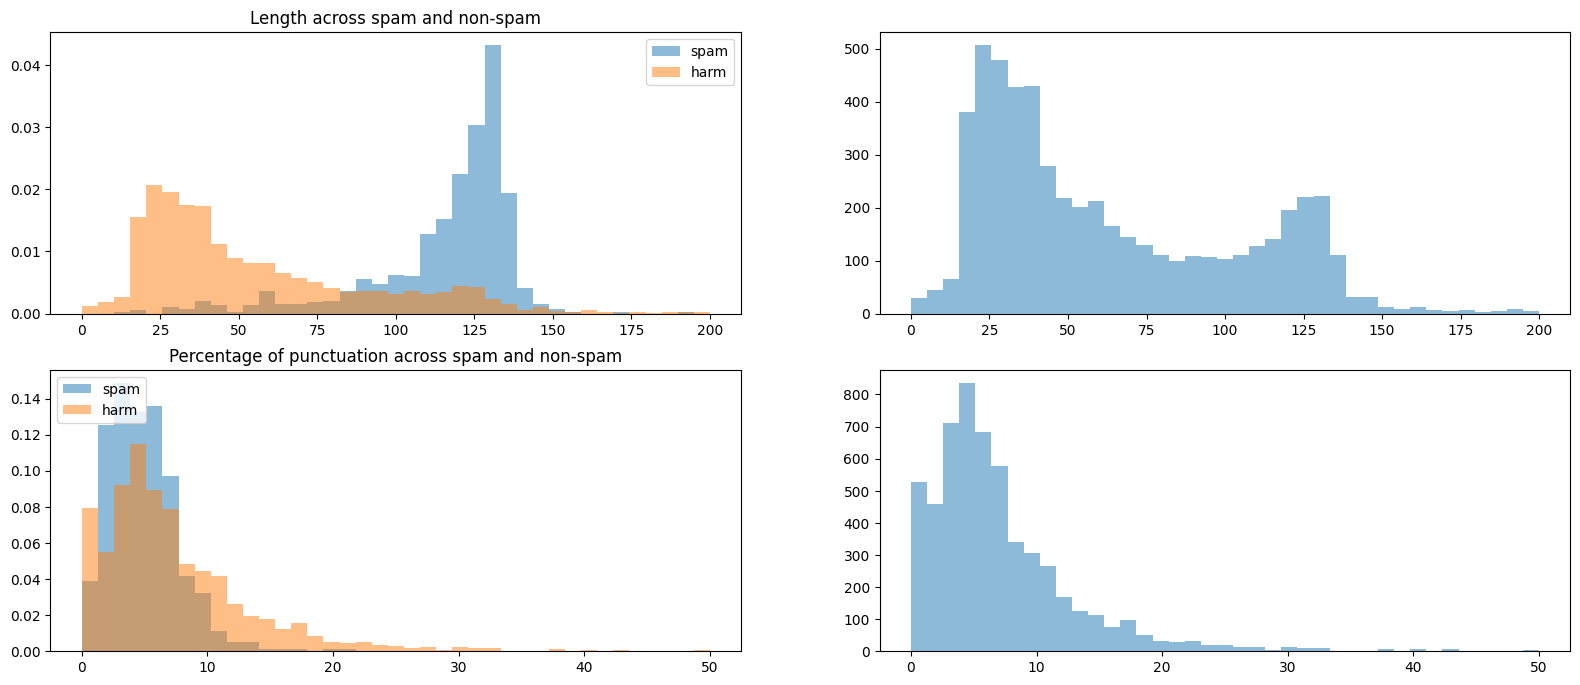

In [10]:
from matplotlib import pyplot
import numpy as np
#%matplotlib inline

pyplot.subplot(2,2,1)
bins = np.linspace(0, 200, 40)  #min value, max value, number of histograms columns
pyplot.hist(fullCorpus[fullCorpus['label']=='spam']['length'],bins, alpha = 0.5, density = True, label = "spam")
pyplot.hist(fullCorpus[fullCorpus['label']=='ham']['length'],bins, alpha =0.5, density = True, label = "harm")
pyplot.legend(loc ='upper right')
pyplot.title('Length across spam and non-spam')

pyplot.subplot(2,2,2)
pyplot.hist(fullCorpus['length'],bins, alpha =0.5, density = False, label = "all")

pyplot.subplot(2,2,3)
bins = np.linspace(0, 50, 40)  #min value, max value, number of histograms columns
pyplot.hist(fullCorpus[fullCorpus['label']=='spam']['% punc'],bins,alpha = 0.5, density = True, label = "spam")
pyplot.hist(fullCorpus[fullCorpus['label']=='ham']['% punc'],bins, alpha = 0.5, density = True, label = "harm")
pyplot.legend(loc ='upper left')
pyplot.title('Percentage of punctuation across spam and non-spam')

pyplot.subplot(2,2,4)
pyplot.hist(fullCorpus['% punc'],bins, alpha =0.5, density = False, label = "all")
pyplot.subplots_adjust(right=2.5, top = 1.4)
pyplot.show()

* > **Machine Classifiers**

We start with machine learning

* > **RandomForest**


Some Eval metrics:
(A = Actual, D = Declared)
Precision: ASpamDspam /D Spam    -> To fight false negative
Accuracy:  %good previsions = (AharmDharm, AspamDspam)/ totalD   -> To fight false positive

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import precision_recall_fscore_support as score

Xdata = pd.concat([fullCorpus['length'],
                   fullCorpus['% punc'],
                   pd.DataFrame(Xti.toarray(), columns = ti.get_feature_names_out())
                  ], axis = 1)

X_tr, X_te, y_tr, y_te = train_test_split(Xdata, fullCorpus['label'], test_size=0.2)



def train_RF(n_est, depth):
    "Function to test multiple parameters"
    rf = RandomForestClassifier(n_estimators = n_est, max_depth= depth, n_jobs= -1)
    rf_model = rf.fit(X_tr,y_tr)
    X_pred =rf_model.predict(X_te)
    precision, recall, fscore, support  = score(y_te, X_pred, pos_label= 'spam', average = 'binary')
    print(f"Estim: {n_est}, Depth {depth} --- Precision:{round(precision,3)}, recall: {round(recall,3)}, Accuracy: {round((X_pred== y_te).sum() / (len(X_pred)),3)}")

    
for n_est in [10, 50, 100]:
    for depth in [10, 20, 30, None]:
        train_RF(n_est, depth)

Estim: 10, Depth 10 --- Precision:1.0, recall: 0.194, Accuracy: 0.888
Estim: 10, Depth 20 --- Precision:0.99, recall: 0.639, Accuracy: 0.949
Estim: 10, Depth 30 --- Precision:0.991, recall: 0.697, Accuracy: 0.957
Estim: 10, Depth None --- Precision:0.992, recall: 0.8, Accuracy: 0.971
Estim: 50, Depth 10 --- Precision:1.0, recall: 0.252, Accuracy: 0.896
Estim: 50, Depth 20 --- Precision:1.0, recall: 0.594, Accuracy: 0.943
Estim: 50, Depth 30 --- Precision:1.0, recall: 0.748, Accuracy: 0.965
Estim: 50, Depth None --- Precision:0.993, recall: 0.865, Accuracy: 0.98
Estim: 100, Depth 10 --- Precision:1.0, recall: 0.245, Accuracy: 0.895
Estim: 100, Depth 20 --- Precision:1.0, recall: 0.639, Accuracy: 0.95
Estim: 100, Depth 30 --- Precision:1.0, recall: 0.755, Accuracy: 0.966
Estim: 100, Depth None --- Precision:1.0, recall: 0.852, Accuracy: 0.979


* > **New model:Gradient Boosting**

train on previous build tree: cannot be parallalelized

In [12]:
from sklearn.ensemble import GradientBoostingClassifier

def train_GrBo(est, max_depth, lr):
    gb = GradientBoostingClassifier(n_estimators = est, max_depth = max_depth, learning_rate=lr)
    gb_model = gb.fit(X_tr, y_tr)
    y_pred = gb_model.predict(X_te)
    precision, recall, fscore, support = score(y_te, y_pred, pos_label = 'spam', average = 'binary')
    print(f"Est = {est}, max depth = {max_depth}, lr = {lr} --- Precision:{round(precision,3)}, recall: {round(recall,3)}, Accuracy: {round((y_pred== y_te).sum() / (len(y_pred)),3)}")
    
for n_est in [50, 150]:
    for max_depth in [3, 15]:
        for lr in [0.01, 1]:
            train_GrBo( n_est, max_depth, lr)

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Est = 50, max depth = 3, lr = 0.01 --- Precision:0.0, recall: 0.0, Accuracy: 0.861
Est = 50, max depth = 3, lr = 1 --- Precision:0.906, recall: 0.813, Accuracy: 0.962
Est = 50, max depth = 15, lr = 0.01 --- Precision:1.0, recall: 0.013, Accuracy: 0.863
Est = 50, max depth = 15, lr = 1 --- Precision:0.937, recall: 0.865, Accuracy: 0.973
Est = 150, max depth = 3, lr = 0.01 --- Precision:0.926, recall: 0.568, Accuracy: 0.934
Est = 150, max depth = 3, lr = 1 --- Precision:0.914, recall: 0.819, Accuracy: 0.964
Est = 150, max depth = 15, lr = 0.01 --- Precision:0.912, recall: 0.806, Accuracy: 0.962
Est = 150, max depth = 15, lr = 1 --- Precision:0.951, recall: 0.871, Accuracy: 0.976


In [13]:
#Grid search is an algrithm to do the previous cell:

#from sklearn.model_selection import GridSearchCV
#gb = GradientBoostingClassifier
#param = {'n_estimators': [50, 150],
#        'max_depth' : [7, 11, 15],
#        'learning_rate': [0.1,1]}
#gs =GridSearchCV(gb, param, cv=5, n_jobs= -1)
#cv_fit = gs.fit(Xdata, fullCorpus['label'])


In [14]:
#pd.DataFrame(cv_fit.cv_results_).sort_values('mean_test_score', ascending = False)[0:7]